<a id="TOC"></a>
# Table of Contents
***
[Problem 1](#Problem_1)<br>
[Problem 2](#Problem_2)<br>
[Problem 18](#Problem_18)<br>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np;
import pandas as pd;
import sympy as sp;

sp.init_printing()
#sp.init_session()

<a id="Problem_1"> </a>   
## Problem 1
***

__Problem Statement:__ <br>
__a.__ Obtain the global stiffness matrix \[K\] of the assemblage shown in Figure P2-1 by superimposing the stiffness matrices of the individual springs. Here $k_1$, $k_2$, and $k_3$ are the stiffness of the springs shown.<br>
__b.__ If nodes 1 and 2 are fixed and a force *P* acts on node 4 in the positive x direction, find an expression for the displacements of nodes 3 and 4.<br>
__c.__ Determine the r.)eaction forces at nodes 1 and 2.<br>
(_Hint:_ Do this problem by writting the nodal equilibrium equations and then making use of the force/displacement relationships for each element as done in the first part of Section 2.4. Then solve the problem by the direct stiffness method.)<br><br>

![alt text](FEM_ch2_p1.png "Logan, Daryl L.(5th Edition).(2019) <br> A First Course in the FINITE ELEMENT METHOD. Stamford, CT: Global Engineering")

## Force Balances

### Force Balance for element 1
$$f_1^{<1>} = k_1 (u_1 - u_3) $$
$$f_3^{<1>} = k_1 (u_3 - u_1) $$

$$
\begin{bmatrix}f_1^{<1>}\\f_3^{<1>}\end{bmatrix} = 
\begin{bmatrix}k_1 & -k_1\\-k_1 & k_1\end{bmatrix}
\begin{bmatrix}u_1\\u_3\end{bmatrix}
$$

### Force Balance for element 2
$$f_3^{<2>} = k_2 (u_3 - u_4) $$
$$f_4^{<4>} = k_2 (u_4 - u_3) $$

$$
\begin{bmatrix}f_3^{<2>}\\f_4^{<2>}\end{bmatrix} = 
\begin{bmatrix}k_2 & -k_2 \\ -k_2 & k_2\end{bmatrix}
\begin{bmatrix}u_3\\u_4\end{bmatrix}
$$

### Force Balance for element 3
$$f_4^{<3>} = k_3 (u4 - u_2) $$
$$f_2^{<3>} = k_3 (u2 - u_4) $$

$$
\begin{bmatrix}f_4^{<3>}\\f_2^{<4>}\end{bmatrix} = 
\begin{bmatrix}k_3 & -k_3 \\ -k_3 & k_3\end{bmatrix}
\begin{bmatrix}u_4 \\ u_2\end{bmatrix}
$$


## Superimpose the matrices

$$
\begin{bmatrix}f_1 \\ f_3 \\ f_4 \\ f_2 \end{bmatrix} =
\begin{bmatrix}
     k_1 & -k_1 & 0 & 0\\
     -k_1 & k_1+k_2 & -k_2 & 0\\
     0 & -k_2 & k_2 + k_3 & -k_2\\
     0 & 0 & -k_3 & k_3
     \end{bmatrix}
\begin{bmatrix}
    u_1 \\ u_3 \\ u_4 \\ u_2
    \end{bmatrix}
$$<br><br>
$$
\boxed{\boldsymbol{K} = 
\begin{bmatrix}
     k_1 & -k_1 & 0 & 0\\
     -k_1 & k_1+k_2 & -k_2 & 0\\
     0 & -k_2 & k_2 + k_3 & -k_2\\
     0 & 0 & -k_3 & k_3
     \end{bmatrix}
     }
$$

1. Though not intuitive, the ordering of the forces and nodal displacements is kept non-sequential to affirm that the ordering of the equations is not significant but extra work may be needed to accurately keep track of the meaning of each position.

## Add in Boundary Conditions and substitute nodal forces

$$
\begin{bmatrix}f_1 \\ 0 \\ P \\ f_2 \end{bmatrix} =
\begin{bmatrix}
     k_1 & -k_1 & 0 & 0\\
     -k_1 & k_1+k_2 & -k_2 & 0\\
     0 & -k_2 & k_2 + k_3 & -k_2\\
     0 & 0 & -k_3 & k_3
     \end{bmatrix}
\begin{bmatrix}
    0 \\ u_3 \\ u_4 \\ 0
    \end{bmatrix}
$$<br><br>

$$
\begin{bmatrix} 0 \\ P \end{bmatrix} =
\begin{bmatrix}
     k_1+k_2 & -k_2\\
     -k_2 & k_2 + k_3\\
     \end{bmatrix}
\begin{bmatrix}
    u_3 \\ u_4
    \end{bmatrix}
$$

## Solve for nodal displacements

$$
\boldsymbol{K^{-1}} = 
\frac{1}{(k_1 + k_2)(k_2 + k_3) - k_2^2}\begin{bmatrix}k_2 + k_3 & k_2 \\k_2 & k_1 + k_2\end{bmatrix}
$$<br><br>

$$ \begin{bmatrix}u_3 \\ u_4 \end{bmatrix} = 
\frac{1}{(k_1 + k_2)(k_2 + k_3) - k_2^2}
\begin{bmatrix}k_2 + k_3 & k_2 \\k_2 & k_1 + k_2\end{bmatrix}
\begin{bmatrix}0 \\ P \end{bmatrix}
$$<br><br>

$$ \boxed{u_3 = \frac{P k_2}{k_1 k_2 + k_1 k_3 + k_2 k_3}}$$
$$ \boxed{u_4 = \frac{P(k_1 + k_2)}{k_1 k_2 + k_1 k_3 + k_2 k_3}}$$

1. Assuming that $(k_1 + k_2)(k_2 + k_3) - k_2^2 \neq 0$
2. note here that the $\boldsymbol{K}^{-1}$ nomenclature is technically inaccurate. This is a modified/reduced stiffness matrix

## Substitute Known Displacements to find reaction forces
$$
\begin{bmatrix}f_1 \\ 0 \\ P \\ f_2 \end{bmatrix} =
\begin{bmatrix}
     k_1 & -k_1 & 0 & 0\\
     -k_1 & k_1+k_2 & -k_2 & 0\\
     0 & -k_2 & k_2 + k_3 & -k_2\\
     0 & 0 & -k_3 & k_3
     \end{bmatrix}
\begin{bmatrix}
    0 \\ \frac{P k_2}{k_1 k_2 + k_1 k_3 + k_2 k_3} \\ \frac{P(k_1 + k_2)}{k_1 k_2 + k_1 k_3 + k_2 k_3} \\ 0
    \end{bmatrix}
$$<br><br>


$$\boxed{f_1 = \frac{-k_1 P k_2}{k_1 k_2 + k_1 k_3 + k_2 k_3}}$$
$$\boxed{f_2 = \frac{-k_3 P(k_1 + k_2)}{k_1 k_2 + k_1 k_3 + k_2 k_3}}$$


[To Table of Contents](#TOC)

<a id="Problem_2"></a>

## Problem 2
***

**Problem Statement:** For the spring assemblage shown in Figure P2-2, determine the displacement at node 2 and the forces in each spring element. Also, determine the force $F_3$.<br>

![alt text](FEM_ch2_p2.png "Logan, Daryl L.(5th Edition).(2019) <br> A First Course in the FINITE ELEMENT METHOD. Stamford, CT: Global Engineering")

**Given:**<br>
$$\delta = 1 in$$
$$k_1 = k_2 = 500 \frac{lbf}{in}$$

**Find:**<br>
1. $u_2$
2. $f^{<1>}$
3. $f^{<2>}$
4. $f_3$

**Note:**
1. In an effort to more rapidly generate answers in the future with less derivation, part of this problem will be an introduction to utilizing python, and the sympy module, in order to generate a solution.
2. Another opportunity taken here is to confirm the performance of code_aster when simulating these solutions. With that said, a simulation was run, and the nodal displacements and forces stored in the attached csv files. The script for running the simulation is also stored locally and available for review in your favorite text editor or to run on your locally code_aster installation.

**Solution:**
The first step when utilizing python code is to import the necessary modules. In this case we will use sympy which is a symbolic mathematical library. After importing the module, we define and assign values to the variables.

```python
import sympy as sp;

k1 = 500;
k2 = k1;
d = 1;

[k1, k2, u1, u2, u3, f1, f2, f3, d] = sp.symbols("k1 k2 u1 u2 u3 f1 f2 f3 d");
```

**Solution:**<br>
by inspection we can define the stiffness matrix, force vector, and displacement vectors.
$$\boldsymbol{K} = \begin{bmatrix}k1 & -k1 & 0\\-k1 & k1+k2 & -k2\\0 & -k2 & k2\end{bmatrix}$$<br>
$$\boldsymbol{F} = \begin{bmatrix}f1\\f2\\f3\end{bmatrix}$$<br>
$$\boldsymbol{U} = \begin{bmatrix}u1\\u2\\u3\end{bmatrix}$$<br>
To do this within python we create a Global Matrices with
```python
K = sp.Matrix([[k1, -k1, 0]
               [-k1, k1+k2, -k2],
               [0, -k2, k2]]);

F = sp.Matrix([f1, f2, f3]);
U = sp.Matrix([u1, u2, u3]);
```

yielding the system of equations
$$ \begin{bmatrix}f_1 \\ f_2 \\ f_3\end{bmatrix} = 
\begin{bmatrix}k1 & -k1 & 0\\-k1 & k1+k2 & -k2\\0 & -k2 & k2\end{bmatrix}
\begin{bmatrix}u_1 \\ u_2 \\ u_3\end{bmatrix}$$

Applying the boundary condition
$$ \begin{bmatrix}f_1 \\ f_2 \\ f_3\end{bmatrix} =  
\begin{bmatrix}k1 & -k1 & 0\\-k1 & k1+k2 & -k2\\0 & -k2 & k2\end{bmatrix}
\begin{bmatrix}0 \\ u_2 \\ \delta\end{bmatrix}$$<br>

Python Code:
```python
U[0]=0;
U[2]=delta;
```

Note that python starts with an index of 0, so the first row of the displacement matrix is accessed with U[0]

Substituting in the nodal forces. Keep in mind that it is a force on node 3 which causes the prescribed displacement and a force on node 1 that enforces the boundary condition.
$$ \begin{bmatrix}f_1 \\ 0 \\ f_3\end{bmatrix} = 
\begin{bmatrix}k1 & -k1 & 0\\-k1 & k1+k2 & -k2\\0 & -k2 & k2\end{bmatrix}
\begin{bmatrix}0 \\ u_2 \\ \delta\end{bmatrix}$$<br>

Python Code:
```python
F[1] = 0;
```

eliminating rows and columns that correspond to $u_1$
$$ \begin{bmatrix}0 \\ f_3\end{bmatrix} = 
\begin{bmatrix}k1+k2 & -k2\\-k2 & k2\end{bmatrix}
\begin{bmatrix}u_2 \\ \delta\end{bmatrix}$$

Python Code:
```python
k_red = K.copy();
k_red.row_del(0);
k_red.col_del(0);

f_red = F.copy();
f_red.row_del(0);

u_red = U.copy();
u_red.row_del(0);
```
Note that we don't want to eliminate the global matrix so we make copies of the global matrices and name the `*_red` and then delete the first row, and column if appropriate, of the copied matrices. Had we simply commanded `k_red = K` then we would be telling the computer to create a variable named `k_red` which has it's value stored in the same memory location as `K`; this would mean that any change done to 'k_red' would also be done to `K`.

solving the first row for $u_2$
$$ \boxed{u_2 = \frac{k_2 \delta}{k_1 + k_2} = 0.5\ inches}$$<br>

Python Code:
```python
U[1] = sp.solve((k_red*u_red)[0], u2)[0];
```
Note that we simply assigned th solved value to the global $\boldsymbol{U}$ matrix. This code can be read as "solve the 1st row of k_red * u_red for u2 and assign the value to the 2nd row of the global displacement matrix." Note that the solve attribute assumes that the expression being solved is equal to zero. The solve attribute returns an array of values; to retrieve the first value within the array, which corresponds to the value of the solved expression, you end the attribute call with `[0]`.



Using the now known $u_2$ displacement to solve the full system of equations for $f_1$ & $f_3$
$$f_3 = -k_2 u_2 + k_2 \delta = 250\ lbf$$<br>
$$f_1 = -k_1 u_2 = -250 lbf$$<br>

The force in element 2 must withstand the force applied at node 3
$$\boxed{f_{3x}^{<2>} = -f_3 = -250 lbf}$$
There is no nodal force applied at node 2 so all of the force in element 3 is transmitted through element 2.
$$\boxed{f_{2x}^{<1>} = f_{3x}^{<2>} = -250\ lbf}$$

Python Code:
```python
F = k*u;
```

The full python code as well as printed results below.

In [83]:
[u1, u2, u3, f1, f2, f3, delta] = sp.symbols("u1 u2 u3 f1 f2 f3 delta")
k1 = 500*12;
k2 = k1;
F = sp.Matrix([f1, f2, f3]);
U = sp.Matrix([u1, u2, u3]);
K = sp.Matrix([[k1, -k1, 0],[-k1, k1+k2, -k2], [0, -k2, k2]]);

delta = 1/12;

F_reduced = F.copy();
F_reduced.row_del(0);

U_reduced = U.copy();
U_reduced.row_del(0);
U_reduced[1] = delta;

K_reduced = K.copy();
K_reduced.row_del(0);
K_reduced.col_del(0);

U[1] = sp.solve((K_reduced*U_reduced)[0], u2)[0]
U[0] = 0;
U[2] = delta;

F = K*U

print("""
    u2 = {:.2f} inches
    F1 = {:3.1f} lbf
    F3 = {:3.1f} lbf
    """.format(U[1]*12, F[0], F[2]))


    u2 = 0.50 inches
    F1 = -250.0 lbf
    F3 = 250.0 lbf
    


**Code Aster Solution:**
As mentioned previously, this problem can be verified using code_aster which is an FEA solver. Teaching the use of code_aster is outside the scope of this project but the command (.comm) file and the CAD model (.hdf) files are included within this repository. The code that follows merely take csv that was generated by code aster and processes it within this python environment to in order to make easy comparison. The processing of the csv file is required because code aster's "native" units are metric so they must be converted to imperial in order to make comparison with the closed-solution easier.

In [99]:
forcesDF = pd.read_csv("FEM_ch2_p2_nodal_forces.csv", skiprows=4)
dispDF = pd.read_csv("FEM_ch2_p2_N2_displacement.csv", skiprows=4)

forcesDF["DX_lbf"] = forcesDF["DX           "]*0.224809;
dispDF["DX_in"] = dispDF["DX          "][0]*39.3701;
print(forcesDF[["NOEUD    ","DX_lbf"]]);
print("\n\n")
print(dispDF[["INTITULE         ", "DX_in"]])

   NOEUD            DX_lbf
0  N1        -2.499988e+02
1  N2        -1.022312e-13
2  N3         2.500011e+02



   INTITULE           DX_in
0  N2 displacement      0.5


[To Table of Contents](#TOC)

<a id="Problem_18"></a>
## Problem 18
***

**Problem Statement:** <br>Use the principle of minimum potential energy developed in Section 2.6 to solve the spring problems shown in Figure P2-18. That is, plot the total potential energy for variations in the displacement of the free end of the spring to determine the minimum potential energy. Observe that the displacement that yields the minimum potential energy also yields the stable equilibrium position.

![alt text](FEM_ch2_p18.png "Logan, Daryl L.(5th Edition).(2019) <br> A First Course in the FINITE ELEMENT METHOD. Stamford, CT: Global Engineering")

**Given:**<br>
(a) F = -1000 lbf, k = 2000 lbf/in<br>
(b) F = -1000 lbf, k = 500 lbf/in<br>
(c) m = 400 kg, k = 2000 N/mm<br>
(d) m = 100 kg, k = 400 N/mm<br>

**Find:**<br>
For problems a through d:
1. Plot of potential energy as a function of displacement.
2. Proof that the displacement at corresponding to the minimum of the potential energy is the solution to the system.

**Assumptions:**<br>
1. acceleration due to gravity is $9.8\frac{m}{s^2}$.
2. The spring follows Hooke's Law.

### Background

First, we must review the equation for the potential energy of the system.<br>

$$\pi_p = U + W$$<br>
where $\pi_p$ is the the potential energy of the system, $U$ is the internal energy caused by a deformation of the system under consideration and $W$ is the work done on the system due to external forces. <br>
The internal energy of the system is caused by a deformation of the spring. Assuming Hooke's law, which states that the deflection of the spring is linearly related to the force which caused displacement, we can say the work done to displace a spring is the area under the curve $F-\delta$ curve shown below giving the equation
$$U = \frac{1}{2}F\delta$$
![alt text](FEM_ch2_p18_fd.png "General Force-deflection graph for deriving the energy stored in a system due to a deformed field")
Knowing that the system is considered to be composed of a system of springs, we can use the Hooke's law $F=k\delta$ to define the internal energy of the system as
$$ U = \frac{1}{2}k\delta^2$$
Since the systems being considered are represented with Matrices we must use the equation below to express the internal energy.
$$ \boldsymbol{U} = \boldsymbol{\delta}^T\boldsymbol{K}\boldsymbol{\delta}$$
It is left to the reader to investigate why the expression above is the only way of arranging the stiffness matrix and displacement vectors.
<br>

Next we form an expression for the work done on the system by the external forces as
$$W = -F_{ext}\delta$$
Which in matrix form is
$$\boldsymbol{W} = -\boldsymbol{F}_{ext}\boldsymbol{\delta}$$
<br>

We can now write the full expression for the potential energy of the system as
$$\boldsymbol{\pi}_p = \boldsymbol{\delta}^T\boldsymbol{K}\boldsymbol{\delta} - \boldsymbol{F}_{ext}\boldsymbol{\delta}$$
<br>which must be minimized by finding differentiating and setting equal to zero.
$$\frac{\partial \boldsymbol{\pi}_p}{\partial \delta_i} = 0$$
where subscript $i$ instructs the user to take the derivative of the row with respect to the Degree of Freedom  of that row. For the sake of discussion, we will continue the background discussion on the single degree of freedom system  yielding the minimum potential energy position as
$$\frac{\partial \pi_p}{\partial \delta} = 0 = k \delta - F_{ext}$$
which is the same equation we would arrive at had we used the direct stiffness method. This concludes the "proof" that the use of the minimum potential energy concept will allow us to derive the stiffness matrix as an alternative to the direct stiffness method.

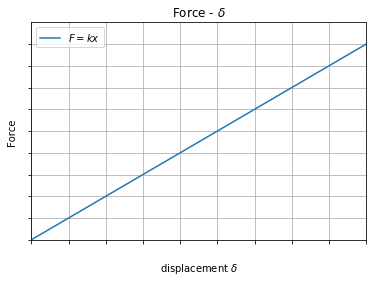

In [4]:
dmy_delta = np.arange(0,1,0.1);
dmy_force = 10*dmy_delta;
plt.plot(dmy_delta, dmy_force, label = "$F = kx$");
plt.grid();
plt.title("Force - $\delta$");
plt.xlabel("displacement $\delta$");
plt.ylabel("Force");
plt.xlim(0,0.5);
plt.ylim(0,10);
plt.xticks(dmy_delta, " ");
plt.yticks(dmy_force, " ");
plt.legend(loc=2)
#plt.savefig("FEM_ch2_p18_fd.png")
plt.show()
del(dmy_delta, dmy_force);

### Problem 18a)


The displacement for part (a) is -1/2 inches
The displacement for part (b) is -2 inches
The displacement for part (c) is -1.96 mm
The displacement for part (d) is -2.45 mm



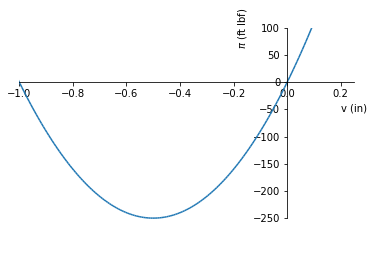

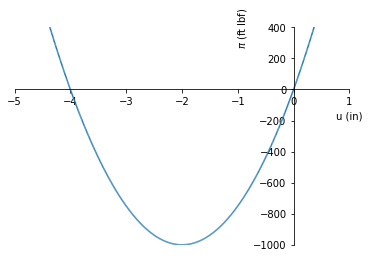

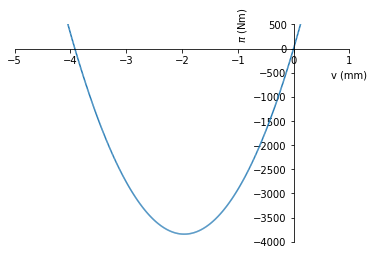

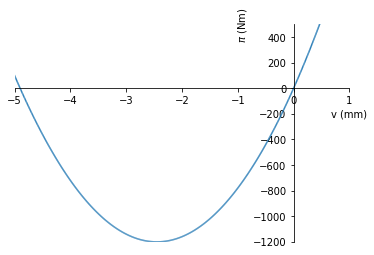

In [70]:
#Part a)
fa, ka, va, pia, Ua, Wa = sp.symbols('fa ka va pia, Ua, Wa')
Ua = 0.5*ka*va**2;
Wa = fa*va;
pia = Ua - Wa;
dpidva = pia.diff(va)
va = sp.solve(dpidva, va)[0]

#Part b)
fb, kb, ub, pib, Ub, Wb = sp.symbols('fb kb ub pib, Ub, Wb')
Ub = 0.5*kb*ub**2;
Wb = fb*ub;
pib = Ub - Wb;
dpidub = pib.diff(ub)
ub = sp.solve(dpidub, ub)[0]

#Part c)
fc, mc, kc, vc , pic, Uc, Wc, g = sp.symbols('fc mc kc vc pic Uc Wc g')
fc = mc*g;
Uc = 0.5*kc*vc**2;
Wc = fc*vc;
pic = Uc - Wc;
dpidvc = pic.diff(vc)
vc = sp.solve(dpidvc, vc)[0]

#Part d)
fd, md, kd, vd, pid, Ud, Wd, g = sp.symbols('fd md kd vd pid Ud Wd g')
fd = md*g;
Ud = 0.5*kd*vd**2;
Wd = fd*vd;
pid = Ud - Wd;
dpidvd = pid.diff(vd)
vd = sp.solve(dpidvd, vd)[0]


print("""
The displacement for part (a) is {:} inches
The displacement for part (b) is {:} inches
The displacement for part (c) is {:3.2f} mm
The displacement for part (d) is {:3.2f} mm
""".format(
    va.subs([(fa, -1000), (ka, 2000)]),
    ub.subs([(fb, -1000), (kb, 500)]),
    vc.subs([(mc, 400), (g, -9.8), (kc, 2000)]),
    vd.subs([(md, 100), (g, -9.8), (kd, 400)])
          ));
sp.plotting.plot(pia.subs([(fa, -1000), (ka,2000)]),
                 xlim = (-1, 0.25), ylim = (-300,100),
                 adaptive=False,
                 nb_of_points=3000,
                 xlabel = "v (in)",
                 ylabel = "$\pi$ (ft lbf)"
                );
sp.plotting.plot(pib.subs([(fb, -1000), (kb,500)]),
                 xlim = (-5, 1), ylim = (-1000,400),
                 adaptive=False,
                 nb_of_points=3000,
                 xlabel = "u (in)",
                 ylabel = "$\pi$ (ft lbf)"
                );
sp.plotting.plot(pic.subs([(g, -9.8),(mc,400), (kc, 2000)]),
                 xlim = (-5, 1), ylim = (-4000,500),
                 adaptive=False,
                 nb_of_points=3000,
                 xlabel = "v (mm)",
                 ylabel = "$\pi$ (Nm)"
                );
sp.plotting.plot(pid.subs([(g, -9.8),(md,100), (kd, 400)]),
                 xlim = (-5, 1), ylim = (-1200,500),
                 adaptive=False,
                 nb_of_points=3000,
                 xlabel="v (mm)",
                 ylabel="$\pi$ (Nm)"
                 
                );
plt.show()
del fa, ka, va, pia, Ua, Wa, dpidva;